In [12]:
# Loading required libraries
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [13]:
# Loading the data
data = pd.read_csv('../data/PredictorLSretWide.csv', parse_dates=['date'])
data

,date,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
0,1926-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-13.686393,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.135248,NaN,NaN,NaN,NaN,NaN,NaN
2,1926-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-4.832534,NaN,NaN,NaN,NaN,NaN,NaN
3,1926-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-4.440934,NaN,NaN,NaN,NaN,NaN,NaN
4,1926-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.483265,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,2022-08-31,1.019538,-2.412224,-1.913597,1.928721,2.741776,NaN,NaN,1.347350,-4.050457,...,-1.615839,-11.692944,-8.326179,-4.467901,0.216663,-5.978392,8.577257,-2.591933,-2.451913,-1.467892
1160,2022-09-30,-2.888651,2.895650,-0.492878,1.546341,-5.482939,NaN,NaN,-6.515619,-2.104168,...,-4.828041,2.106418,2.906625,-3.030688,0.105947,8.239848,0.485810,10.430349,6.948029,4.607782
1161,2022-10-31,3.384184,-3.041480,-0.437972,1.439492,14.154554,NaN,NaN,-2.241708,5.847384,...,-2.659325,13.064743,9.269617,-0.339419,-0.638394,-4.242074,-8.276771,-4.179820,-3.358313,-5.818550
1162,2022-11-30,-0.060910,2.179653,0.734355,-1.934128,-0.503022,NaN,NaN,-0.914064,5.350460,...,-1.242773,11.645717,14.288103,-0.150439,2.255298,5.601910,-5.353664,-6.738538,-2.475098,-2.581228


In [14]:
# Summary statistics of the data
data.describe

<bound method NDFrame.describe of            date        AM       AOP  AbnormalAccruals  Accruals  AccrualsBM  \
0    1926-01-30       NaN       NaN               NaN       NaN         NaN   
1    1926-02-27       NaN       NaN               NaN       NaN         NaN   
2    1926-03-31       NaN       NaN               NaN       NaN         NaN   
3    1926-04-30       NaN       NaN               NaN       NaN         NaN   
4    1926-05-28       NaN       NaN               NaN       NaN         NaN   
...         ...       ...       ...               ...       ...         ...   
1159 2022-08-31  1.019538 -2.412224         -1.913597  1.928721    2.741776   
1160 2022-09-30 -2.888651  2.895650         -0.492878  1.546341   -5.482939   
1161 2022-10-31  3.384184 -3.041480         -0.437972  1.439492   14.154554   
1162 2022-11-30 -0.060910  2.179653          0.734355 -1.934128   -0.503022   
1163 2022-12-30  0.603799  0.097639          3.150977  1.406165    1.824112   

      Activism1  

In [15]:
data.shape

(1164, 213)

## Dataset Overview

### Description

This dataset contains **monthly long-short portfolio returns** derived from a broad range of **predictive signals** used in empirical asset pricing. Each column corresponds to a financial characteristic or strategy (e.g., Book-to-Market, Momentum, Accruals), and each row represents a monthly observation.

- **Time span**: January 1926 to December 2022
- **Frequency**: Monthly
- **Number of predictors**: ~212 signals (before filtering)
- **Values**: Long-minus-short equity portfolio returns (in percentage points)

These signals are commonly used as **test assets** in factor model research and signal evaluation.

---

### Variables Included

The dataset includes a diverse set of predictor categories:

- **Valuation-based**: `BM`, `EP`, `CF`, `Accruals`, `NOA`
- **Momentum-based**: `Mom12m`, `ResidualMomentum`, `LRreversal`, `STreversal`
- **Profitability and quality**: `OperProf`, `ROE`, `GP`, `OScore`
- **Risk and volatility**: `Beta`, `IdioVol3F`, `RealizedVol`
- **Analyst sentiment**: `UpRecomm`, `DownRecomm`, `ForecastDispersion`
- **Corporate events**: `ShareIss1Y`, `DebtIssuance`, `DivYieldST`, `AgeIPO`
- **Others**: `RD`, `BrandInvest`, `CustomerMomentum`, `Spinoff`

## Data Cleaning and Processing Steps

In [16]:
# Sort by date and use 'date' as index for time series operations
data = data.sort_values('date')
data.set_index('date', inplace=True)

The `date` column is parsed as a datetime object. The dataset is sorted chronologically and `date` is set as the index to enable proper time series operations.

C:\Users\egatz\AppData\Local\Temp\ipykernel_29920\1758804987.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  missing_by_year = data.isnull().mean(axis=1).resample('Y').mean()


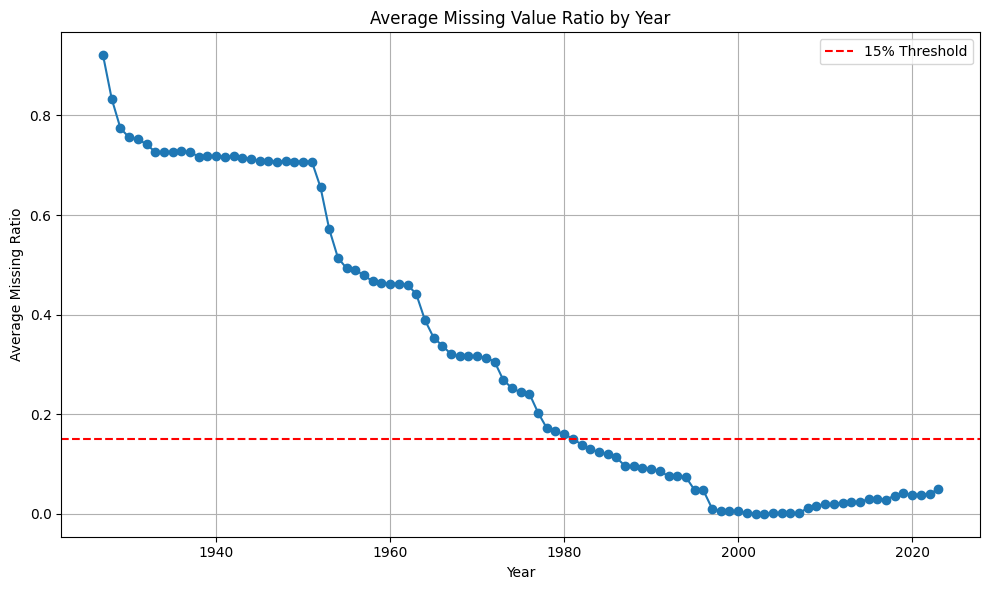

In [17]:
# Determine when data becomes usable (based on missing values)
# Plot the missingness ratio year by year

# Compute % of missing values across all predictors, year by year
missing_by_year = data.isnull().mean(axis=1).resample('Y').mean()

plt.figure(figsize=(10, 6))
plt.plot(missing_by_year.index, missing_by_year.values, marker='o', linestyle='-')

plt.axhline(0.15, color='red', linestyle='--', label='15% Threshold')  # Show the 15% threshold

plt.title('Average Missing Value Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Average Missing Ratio')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Select first year where less than 15% of values are missing
start_year = missing_by_year[missing_by_year < 0.15].index.min()

# Keep only data from this year onward
data = data[data.index >= start_year]
data

,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AnalystRevision,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
date,,,,,,,,,,,,,,,,,,,,,
1981-12-31,1.123297,0.329896,0.834930,-0.196268,0.842362,NaN,NaN,1.430345,8.543315,-1.051485,...,0.976691,2.247575,0.111061,-2.224378,NaN,-4.628083,1.553102,0.031923,-0.413139,0.913135
1982-01-29,3.088656,2.585794,-0.176898,0.209296,4.344342,NaN,NaN,4.394482,-1.718612,0.257670,...,6.615408,-2.421048,3.020728,-1.624565,NaN,2.290128,0.191220,-0.247218,-0.304807,0.600996
1982-02-26,8.471630,3.336060,-0.875683,-0.205539,7.475745,NaN,NaN,6.095475,1.448159,1.361491,...,8.300416,-0.553835,8.179609,1.678503,NaN,3.782215,-0.375331,3.475621,2.513308,3.917991
1982-03-31,2.596339,0.593736,1.730193,1.048555,2.600496,NaN,NaN,4.680672,0.304563,-0.385160,...,8.759554,-2.685391,3.351475,2.030959,NaN,-3.193977,-0.228034,3.020301,2.415934,1.432082
1982-04-30,-2.365282,-0.074391,-2.291654,0.764536,-6.033923,NaN,NaN,-2.085969,-2.180136,0.871818,...,-2.860056,4.598884,-1.233992,-0.474440,NaN,-3.078778,-0.321519,-3.224027,-3.262619,-2.235000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1.019538,-2.412224,-1.913597,1.928721,2.741776,NaN,NaN,1.347350,-4.050457,0.510279,...,-1.615839,-11.692944,-8.326179,-4.467901,0.216663,-5.978392,8.577257,-2.591933,-2.451913,-1.467892
2022-09-30,-2.888651,2.895650,-0.492878,1.546341,-5.482939,NaN,NaN,-6.515619,-2.104168,-0.242502,...,-4.828041,2.106418,2.906625,-3.030688,0.105947,8.239848,0.485810,10.430349,6.948029,4.607782
2022-10-31,3.384184,-3.041480,-0.437972,1.439492,14.154554,NaN,NaN,-2.241708,5.847384,0.048826,...,-2.659325,13.064743,9.269617,-0.339419,-0.638394,-4.242074,-8.276771,-4.179820,-3.358313,-5.818550


### **Handling Missing Values**

In [19]:
# Drop columns (predictors) with more than 15% missing values
# This ensures we retain only reasonably complete signals
col_missing_ratio = data.isnull().mean()
data = data.loc[:, col_missing_ratio <= 0.15]
data

,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,AdExp,AgeIPO,AnalystRevision,AnalystValue,AnnouncementReturn,...,realestate,retConglomerate,roaq,sfe,sinAlgo,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
date,,,,,,,,,,,,,,,,,,,,,
1981-12-31,1.123297,0.329896,0.834930,-0.196268,0.842362,1.430345,8.543315,-1.051485,-0.294144,1.556126,...,-2.693260,0.976691,2.247575,0.111061,-2.224378,-4.628083,1.553102,0.031923,-0.413139,0.913135
1982-01-29,3.088656,2.585794,-0.176898,0.209296,4.344342,4.394482,-1.718612,0.257670,-0.739232,1.381684,...,-0.089643,6.615408,-2.421048,3.020728,-1.624565,2.290128,0.191220,-0.247218,-0.304807,0.600996
1982-02-26,8.471630,3.336060,-0.875683,-0.205539,7.475745,6.095475,1.448159,1.361491,0.527002,1.743291,...,-1.720387,8.300416,-0.553835,8.179609,1.678503,3.782215,-0.375331,3.475621,2.513308,3.917991
1982-03-31,2.596339,0.593736,1.730193,1.048555,2.600496,4.680672,0.304563,-0.385160,-0.392392,-0.117950,...,-0.367701,8.759554,-2.685391,3.351475,2.030959,-3.193977,-0.228034,3.020301,2.415934,1.432082
1982-04-30,-2.365282,-0.074391,-2.291654,0.764536,-6.033923,-2.085969,-2.180136,0.871818,-2.262606,2.809961,...,2.100906,-2.860056,4.598884,-1.233992,-0.474440,-3.078778,-0.321519,-3.224027,-3.262619,-2.235000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1.019538,-2.412224,-1.913597,1.928721,2.741776,1.347350,-4.050457,0.510279,-3.875490,-1.632099,...,-1.317891,-1.615839,-11.692944,-8.326179,-4.467901,-5.978392,8.577257,-2.591933,-2.451913,-1.467892
2022-09-30,-2.888651,2.895650,-0.492878,1.546341,-5.482939,-6.515619,-2.104168,-0.242502,-1.463113,2.871068,...,-2.241875,-4.828041,2.106418,2.906625,-3.030688,8.239848,0.485810,10.430349,6.948029,4.607782
2022-10-31,3.384184,-3.041480,-0.437972,1.439492,14.154554,-2.241708,5.847384,0.048826,9.307230,0.660279,...,-3.100931,-2.659325,13.064743,9.269617,-0.339419,-4.242074,-8.276771,-4.179820,-3.358313,-5.818550


Many columns contain extensive missing values in the early part of the dataset.  
To ensure data quality:
- The average missing data ratio per year is computed.
- The dataset is trimmed to start from the first year where the missing data ratio falls below 15%.
- Based on this criterion, the dataset is trimmed to start from **1981**.

In [20]:
# Fill remaining missing values
# Linear interpolation across time, then fill any remaining gaps at edges
data = data.interpolate(method='linear')
data = data.fillna(method='ffill').fillna(method='bfill')
data

C:\Users\egatz\AppData\Local\Temp\ipykernel_29920\3721941928.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,AdExp,AgeIPO,AnalystRevision,AnalystValue,AnnouncementReturn,...,realestate,retConglomerate,roaq,sfe,sinAlgo,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
date,,,,,,,,,,,,,,,,,,,,,
1981-12-31,1.123297,0.329896,0.834930,-0.196268,0.842362,1.430345,8.543315,-1.051485,-0.294144,1.556126,...,-2.693260,0.976691,2.247575,0.111061,-2.224378,-4.628083,1.553102,0.031923,-0.413139,0.913135
1982-01-29,3.088656,2.585794,-0.176898,0.209296,4.344342,4.394482,-1.718612,0.257670,-0.739232,1.381684,...,-0.089643,6.615408,-2.421048,3.020728,-1.624565,2.290128,0.191220,-0.247218,-0.304807,0.600996
1982-02-26,8.471630,3.336060,-0.875683,-0.205539,7.475745,6.095475,1.448159,1.361491,0.527002,1.743291,...,-1.720387,8.300416,-0.553835,8.179609,1.678503,3.782215,-0.375331,3.475621,2.513308,3.917991
1982-03-31,2.596339,0.593736,1.730193,1.048555,2.600496,4.680672,0.304563,-0.385160,-0.392392,-0.117950,...,-0.367701,8.759554,-2.685391,3.351475,2.030959,-3.193977,-0.228034,3.020301,2.415934,1.432082
1982-04-30,-2.365282,-0.074391,-2.291654,0.764536,-6.033923,-2.085969,-2.180136,0.871818,-2.262606,2.809961,...,2.100906,-2.860056,4.598884,-1.233992,-0.474440,-3.078778,-0.321519,-3.224027,-3.262619,-2.235000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1.019538,-2.412224,-1.913597,1.928721,2.741776,1.347350,-4.050457,0.510279,-3.875490,-1.632099,...,-1.317891,-1.615839,-11.692944,-8.326179,-4.467901,-5.978392,8.577257,-2.591933,-2.451913,-1.467892
2022-09-30,-2.888651,2.895650,-0.492878,1.546341,-5.482939,-6.515619,-2.104168,-0.242502,-1.463113,2.871068,...,-2.241875,-4.828041,2.106418,2.906625,-3.030688,8.239848,0.485810,10.430349,6.948029,4.607782
2022-10-31,3.384184,-3.041480,-0.437972,1.439492,14.154554,-2.241708,5.847384,0.048826,9.307230,0.660279,...,-3.100931,-2.659325,13.064743,9.269617,-0.339419,-4.242074,-8.276771,-4.179820,-3.358313,-5.818550



Columns with more than 15% missing data are dropped. This step ensures that only predictors with a reasonable level of completeness are retained.

Missing values that remain after trimming are filled using:
- **Linear interpolation** across time.
- **Forward-fill and backward-fill** to handle any remaining gaps at the dataset's edges.

## Construction of `rt` and `gt`

In [21]:
# Extract momentum-related predictors for gt
momentum_keywords = ['Mom', 'Reversal', 'ResidualMomentum', 'LRreversal', 'MRreversal', 'STreversal']
momentum_cols = [col for col in data.columns if any(k in col for k in momentum_keywords)]

if not momentum_cols:
    raise ValueError("No momentum-related columns found. Adjust keyword list if needed.")

# Create gt matrix from selected momentum predictors (d × T)
gt = data[momentum_cols].transpose().values  # shape: (d, time)

# Remove gt columns from data to prevent leakage into rt
data_rt = data.drop(columns=momentum_cols)

# Create rt matrix from remaining predictors (N × T)
rt = data_rt.transpose().values

### What is `rt`?

`rt` is the matrix of returns for the test assets (predictive signals).  
Each row corresponds to a predictor, and each column represents a monthly return.

- **Shape**: `(N, T)`, where `N` = number of predictors and `T` = number of months.

### What is `gt`?

`gt` is the matrix of target factors, constructed from momentum-related signals.  
This set of signals acts as the "supervised" target for SPCA to learn from.

Momentum-related columns are identified using keywords such as:
- `"Mom"`, `"Reversal"`, `"ResidualMomentum"`, `"STreversal"`, `"LRreversal"`, `"MRreversal"`

Selecting momentum makes sense for several reasons:
- Momentum is a well-established pricing anomaly in finance.
- It provides a strong target signal for SPCA, which aims to uncover latent structures relevant to the specified target.
- Momentum effects often exhibit characteristics (such as weak exposures across broad cross-sections) that make SPCA particularly valuable compared to unsupervised PCA.

### Transposition Step

Initially, the dataset is structured with:
- Rows representing time (monthly dates)
- Columns representing predictors

To align the format with SPCA/PCA expectations:
- The dataset is **transposed** so that each **predictor becomes a row**, and each **month becomes a column**.
- After transposition:
  - `rt` has dimensions `(N, T)` — predictors × time
  - `gt` has dimensions `(d, T)` — target factors × time

In [22]:
# Print key outputs
print(f" Data starts from: {start_year.strftime('%Y-%m-%d')}")
print(f" rt shape (test assets): {rt.shape} [assets × time]")
print(f" gt shape (momentum proxies): {gt.shape} [factors × time]")
print(f" Sample Momentum factors: {momentum_cols[:5]}")
print(f" Sample Predictors for PCA: {data_rt.columns[:5].tolist()}")

 Data starts from: 1981-12-31
 rt shape (test assets): (166, 493) [assets × time]
 gt shape (momentum proxies): (23, 493) [factors × time]
 Sample Momentum factors: ['CustomerMomentum', 'FirmAgeMom', 'IndMom', 'IntMom', 'LRreversal']
 Sample Predictors for PCA: ['AM', 'AOP', 'AbnormalAccruals', 'Accruals', 'AccrualsBM']
